In [2]:
import pandas as pd

In [49]:
import sys
sys.path.append('modules')
from plotting import plot_comparison, DEFAULT_PROP_NAMES,DEFAULT_PRED_NAMES

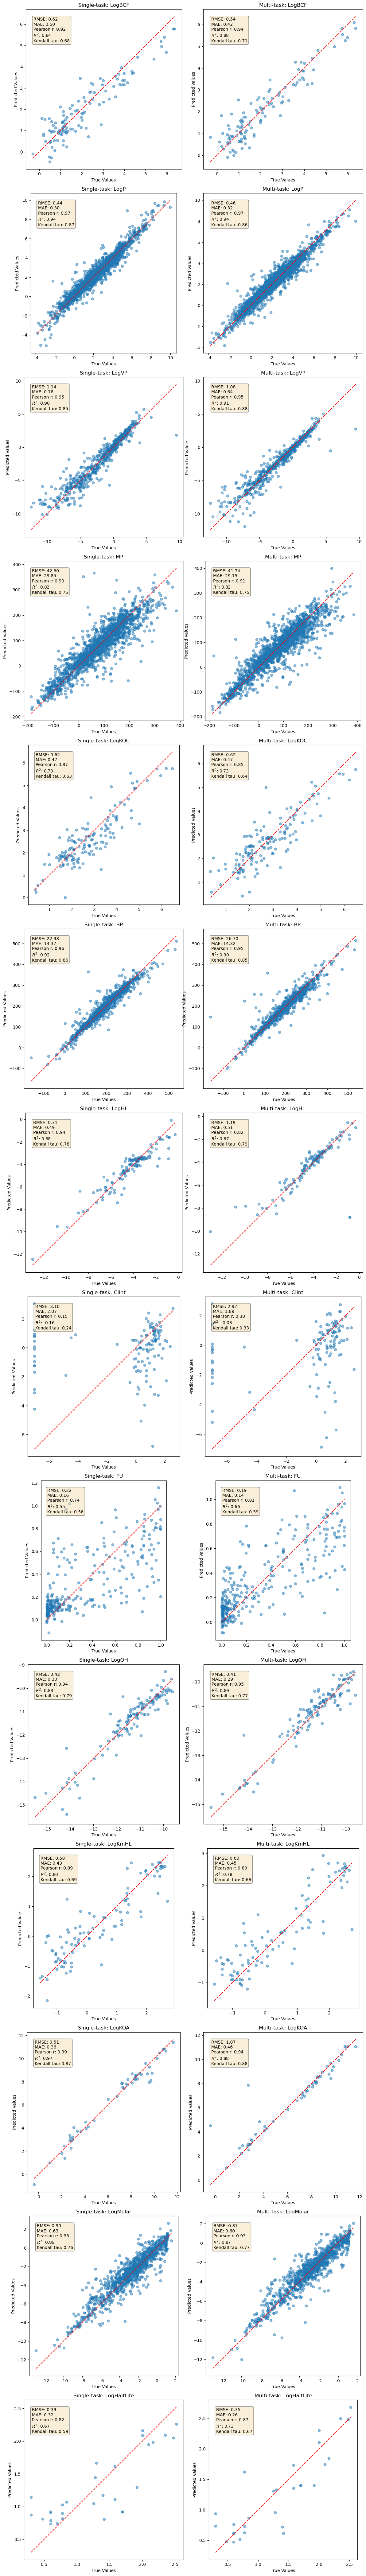

In [10]:
single_task_dfs = [pd.read_csv(f'chemprop_out/{prop}_0.csv') for prop in DEFAULT_PROP_NAMES]
multi_task_df = pd.read_csv('chemprop_out/mtl_all_0.csv')
plot_comparison(single_task_dfs=single_task_dfs, multi_task_df=multi_task_df)

In [25]:
#impact of hp opt: load all csv files from chemprop_out_default_hps. load same filename from folder chemprop_out_after_hpopt. calculate RMSE and kendall tau for both and print out prop name (name of csv file) and values for both
import glob
import os
#import functions to calculate RMSE and kendall tau
from sklearn.metrics import root_mean_squared_error
from scipy.stats import kendalltau
rmses,ktaus,props = [],[],[]
for filename in glob.glob('chemprop_out_after_hpopt/*.csv'):
    prop_name = os.path.basename(filename).split('.')[0]
    prop_name = prop_name.split('_')[0]
    if 'mtl' in prop_name:
        continue
    vals_no_hp_opt = pd.read_csv(filename)
    vals_hp_opt = pd.read_csv(f'chemprop_out_default_hps/{prop_name}_0.csv')
    rmse_no_hp_opt = root_mean_squared_error(vals_no_hp_opt[prop_name], vals_no_hp_opt['pred_0'])
    rmse_hp_opt = root_mean_squared_error(vals_hp_opt[prop_name], vals_hp_opt['pred_0'])
    tau_no_hp_opt, _ = kendalltau(vals_no_hp_opt[prop_name], vals_no_hp_opt['pred_0'])
    tau_hp_opt, _ = kendalltau(vals_hp_opt[prop_name], vals_hp_opt['pred_0'])
    rmses.append((rmse_no_hp_opt, rmse_hp_opt))
    ktaus.append((tau_no_hp_opt, tau_hp_opt))
    props.append(prop_name)    
    #also print out rounded (2) values
    print(f'{prop_name}: RMSE no hp opt: {round(rmse_no_hp_opt,2)}, RMSE hp opt: {round(rmse_hp_opt,2)}')

LogVP: RMSE no hp opt: 1.14, RMSE hp opt: 1.21
LogBCF: RMSE no hp opt: 0.62, RMSE hp opt: 0.6
LogP: RMSE no hp opt: 0.44, RMSE hp opt: 0.45
BP: RMSE no hp opt: 22.98, RMSE hp opt: 24.15
LogKOA: RMSE no hp opt: 0.51, RMSE hp opt: 0.67
MP: RMSE no hp opt: 42.6, RMSE hp opt: 41.79
Clint: RMSE no hp opt: 3.1, RMSE hp opt: 3.11
LogHL: RMSE no hp opt: 0.71, RMSE hp opt: 0.76
FU: RMSE no hp opt: 0.22, RMSE hp opt: 0.23
LogKOC: RMSE no hp opt: 0.62, RMSE hp opt: 0.62
LogKmHL: RMSE no hp opt: 0.58, RMSE hp opt: 0.62
LogOH: RMSE no hp opt: 0.42, RMSE hp opt: 0.39
LogHalfLife: RMSE no hp opt: 0.39, RMSE hp opt: 0.45
LogMolar: RMSE no hp opt: 0.9, RMSE hp opt: 0.89


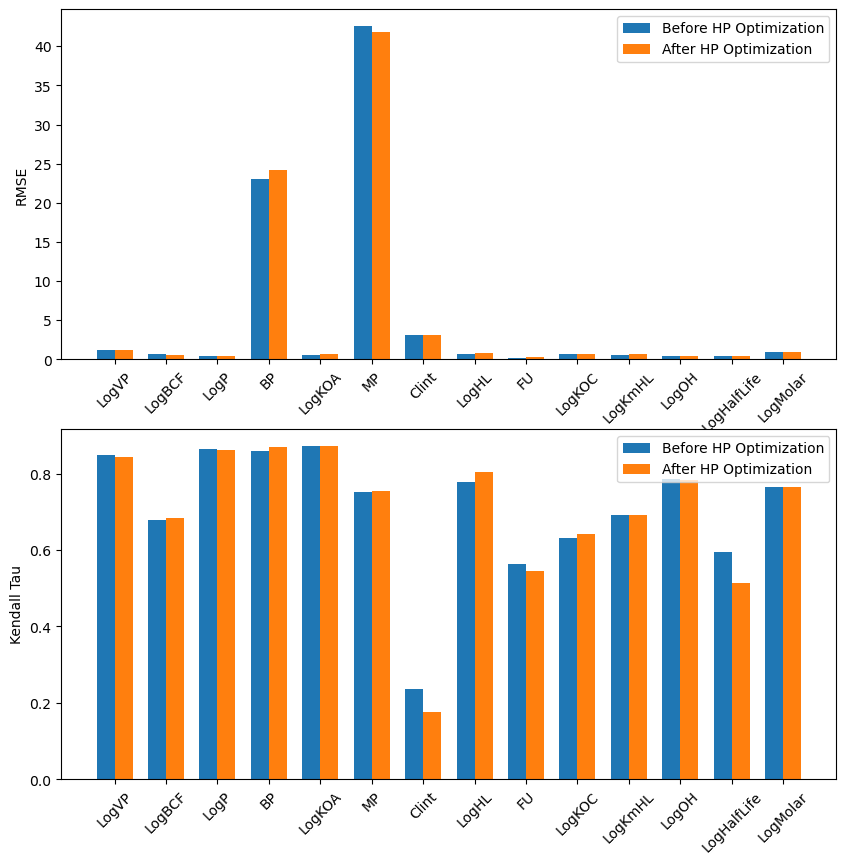

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# Define the number of bars
n_bars = len(props)

# Define the positions of the bars
indices = np.arange(n_bars)

# Define the width of the bars
bar_width = 0.35

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot RMSE bars
ax[0].bar(indices - bar_width/2, [rmse[0] for rmse in rmses], bar_width, label='Before HP Optimization')
ax[0].bar(indices + bar_width/2, [rmse[1] for rmse in rmses], bar_width, label='After HP Optimization')
ax[0].set_ylabel('RMSE')
ax[0].set_xticks(indices)
ax[0].set_xticklabels(props)
ax[0].legend()
ax[0].set_xticklabels(props,rotation=45)

# Plot Kendall Tau bars
ax[1].bar(indices - bar_width/2, [tau[0] for tau in ktaus], bar_width, label='Before HP Optimization')
ax[1].bar(indices + bar_width/2, [tau[1] for tau in ktaus], bar_width, label='After HP Optimization')
ax[1].set_ylabel('Kendall Tau')
ax[1].set_xticks(indices)
ax[1].set_xticklabels(props)
ax[1].legend()
plt.xticks(rotation=45)
plt.show()

In [50]:
df_post_hp = pd.read_csv('chemprop_out_after_hpopt/mtl_all/model_0/test_predictions.csv')
df_pre_hp = pd.read_csv('chemprop_out_default_hps/mtl_all/model_0/test_predictions.csv')
df_post_hp_cols = df_post_hp.columns[1:]
df_pre_hp_cols = df_pre_hp.columns[1:]
prop_to_pred_idx_post_hp = {}
prop_to_pred_idx_pre_hp = {}
for prop1,props2,idx in zip(df_post_hp_cols,df_pre_hp_cols,DEFAULT_PRED_NAMES):
    prop_to_pred_idx_post_hp[prop1] = idx
    prop_to_pred_idx_pre_hp[props2] = idx

LogBCF: RMSE pre hp opt: 0.53, RMSE post hp opt: 0.54
LogP: RMSE pre hp opt: 0.47, RMSE post hp opt: 0.46
LogVP: RMSE pre hp opt: 1.08, RMSE post hp opt: 1.08
MP: RMSE pre hp opt: 41.57, RMSE post hp opt: 41.74
LogKOC: RMSE pre hp opt: 0.71, RMSE post hp opt: 0.62
BP: RMSE pre hp opt: 26.4, RMSE post hp opt: 26.7
LogHL: RMSE pre hp opt: 0.8, RMSE post hp opt: 1.19
Clint: RMSE pre hp opt: 3.25, RMSE post hp opt: 2.92
FU: RMSE pre hp opt: 0.21, RMSE post hp opt: 0.19
LogOH: RMSE pre hp opt: 0.49, RMSE post hp opt: 0.41
LogKmHL: RMSE pre hp opt: 0.53, RMSE post hp opt: 0.6
LogKOA: RMSE pre hp opt: 0.65, RMSE post hp opt: 1.07
LogMolar: RMSE pre hp opt: 0.87, RMSE post hp opt: 0.87
LogHalfLife: RMSE pre hp opt: 0.37, RMSE post hp opt: 0.35


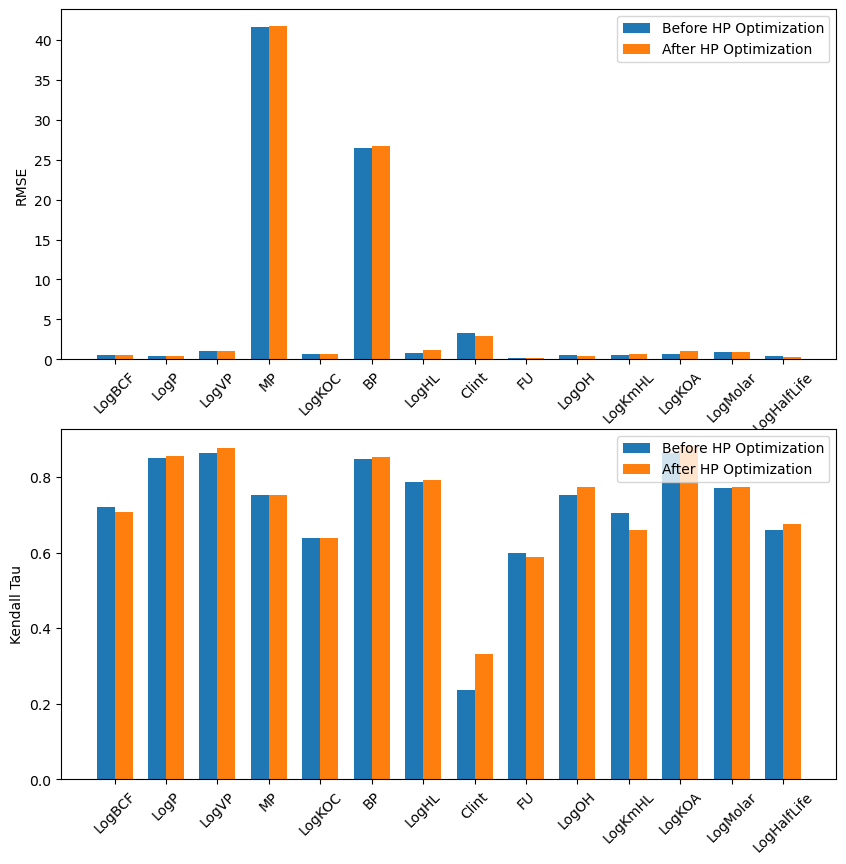

In [57]:
df_post_hp_results = pd.read_csv('chemprop_out_after_hpopt/mtl_all_0.csv')
df_pre_hp_results = pd.read_csv('chemprop_out_default_hps/mtl_all_0.csv')
ktaus,rmses = [],[]
for prop in DEFAULT_PROP_NAMES:
    prop_idx_post = prop_to_pred_idx_post_hp[prop]
    prop_idx_pre = prop_to_pred_idx_pre_hp[prop]
    #get vals
    post = df_post_hp_results[['SMILES', prop, prop_idx_post]].dropna()
    true_post_values = post[prop]
    pred_post_values = post[prop_idx_post]
    #get vals
    pre = df_pre_hp_results[['SMILES', prop, prop_idx_pre]].dropna()
    true_pre_values = pre[prop]
    pred_pre_values = pre[prop_idx_pre]

    rmse_post = root_mean_squared_error(true_post_values, pred_post_values)
    rmse_pre = root_mean_squared_error(true_pre_values, pred_pre_values)
    tau_post, _ = kendalltau(true_post_values, pred_post_values)
    tau_pre, _ = kendalltau(true_pre_values, pred_pre_values)
    rmses.append((rmse_pre, rmse_post))
    ktaus.append((tau_pre, tau_post))
    #also print out rounded (2) values
    print(f'{prop}: RMSE pre hp opt: {round(rmse_pre,2)}, RMSE post hp opt: {round(rmse_post,2)}')

# Define the number of bars
n_bars = len(DEFAULT_PROP_NAMES)

# Define the positions of the bars
indices = np.arange(n_bars)

# Define the width of the bars
bar_width = 0.35

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot RMSE bars
ax[0].bar(indices - bar_width/2, [rmse[0] for rmse in rmses], bar_width, label='Before HP Optimization')
ax[0].bar(indices + bar_width/2, [rmse[1] for rmse in rmses], bar_width, label='After HP Optimization')
ax[0].set_ylabel('RMSE')
ax[0].set_xticks(indices)
ax[0].set_xticklabels(DEFAULT_PROP_NAMES)
ax[0].legend()
ax[0].set_xticklabels(DEFAULT_PROP_NAMES,rotation=45)

# Plot Kendall Tau bars
ax[1].bar(indices - bar_width/2, [tau[0] for tau in ktaus], bar_width, label='Before HP Optimization')
ax[1].bar(indices + bar_width/2, [tau[1] for tau in ktaus], bar_width, label='After HP Optimization')
ax[1].set_ylabel('Kendall Tau')
ax[1].set_xticks(indices)
ax[1].set_xticklabels(DEFAULT_PROP_NAMES)
ax[1].legend()
plt.xticks(rotation=45)
plt.show()

